In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot


In [2]:
def roc(ytest, prob_list):
    # generate a no skill prediction (majority class)

    ns_probs = [0 for _ in range(len(list(ytest)))]

    
    # keep probabilities for the positive outcome only
    lr_probs = prob_list[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(list(ytest), ns_probs)
    lr_auc = roc_auc_score(list(ytest), lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(list(ytest), ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(list(ytest), lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [3]:
def recall_precision(testy, lr_probs):
    # predict class values   
    lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
    lr_auc =  auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    no_skill = len(testy[testy==1]) / len(testy)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# Data Loading

In [4]:
import joblib

X_train_eng = joblib.load("models/X_and_y/X_train_eng.pkl") 
X_test_eng = joblib.load("models/X_and_y/X_test_eng.pkl") 
y_train_eng = joblib.load("models/X_and_y/y_train_eng.pkl")
y_test_eng = joblib.load("models/X_and_y/y_test_eng.pkl")


## Spanish train

In [5]:
spanish_TRAIN = 'es_train_bert-base-es-cased_embdded.pkl'
spanish_TRAIN_label = '../data/train_es'

In [6]:
es_TRAIN = torch.load(spanish_TRAIN)
es_TRAIN = [x.numpy().reshape(-1) for x in es_TRAIN]

es_train_set = pd.read_csv(spanish_TRAIN_label)
es_train_set_y = es_train_set. stars

In [7]:
len(es_train_set_y)

80000

In [8]:
es_train_set_y[es_train_set_y == 1] = 0 
es_train_set_y[es_train_set_y == 5] = 1 

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


### Spanish val

In [9]:
spanish_val = 'es_val_bert-base-es-cased_embdded.pkl'
spanish_val_label = '../data/val_es'

In [10]:
es_VAL = torch.load(spanish_val)
es_VAL = [x.numpy().reshape(-1) for x in es_VAL]

es_VAL_set = pd.read_csv(spanish_val_label)
es_VAL_set_y = es_VAL_set. stars

In [11]:
es_VAL_set_y[es_VAL_set_y == 1] = 0 
es_VAL_set_y[es_VAL_set_y == 5] = 1 

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [12]:
len(es_VAL)

2000

## Spanish translated to English train

In [13]:
spanish_translated_to_en_train = 'es_to_eng_train_embedded.pkl'
spanish_translated_to_en_train_label = '../data/train_es'

In [14]:
es_translated_to_eng_train = torch.load(spanish_translated_to_en_train)
es_translated_to_eng_train = [x.numpy().reshape(-1) for x in es_translated_to_eng_train]

es_translated_to_en_train_label = pd.read_csv(spanish_translated_to_en_train_label)
es_translated_to_en_train_label = es_translated_to_en_train_label. stars

In [15]:
len(es_translated_to_en_train_label)

80000

In [16]:
es_translated_to_en_train_label[es_translated_to_en_train_label == 1] = 0 
es_translated_to_en_train_label[es_translated_to_en_train_label == 5] = 1 

# Logistic regression -English

# Train results

In [17]:
pipe = joblib.load("models/Logistic_Regression/logistic_regression.pkl")

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.994


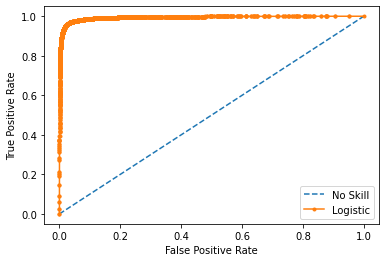

In [18]:
roc(y_train_eng, pipe.predict_proba(X_train_eng))

## Test - English only

In [19]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(X_test_eng), y_test_eng, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96      1006
     class 1       0.96      0.96      0.96       994

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.990


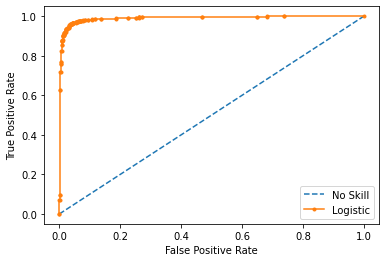

In [20]:
roc(y_test_eng, pipe.predict_proba(X_test_eng))

### precision recall

Logistic: auc=0.988


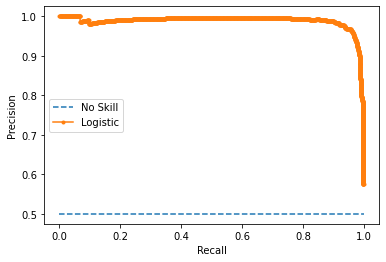

In [21]:
lr_probs = pipe.predict_proba(X_test_eng)
lr_probs = lr_probs[:, 1]
recall_precision(y_test_eng, lr_probs)

<b> Now we create prediction for the translated Spanish  data set to create synthetic labels. We will do it using the "train" dataset to simulate 
that we have large amount of unlabeld data  </b>

In [22]:
y_pred_es_train = pipe.predict(es_translated_to_eng_train)

<b> how good is the prediction are? predicted labels vs original labels </b>

In [23]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(y_pred_es_train, list(es_translated_to_en_train_label), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.95      0.95     39903
     class 1       0.95      0.95      0.95     40097

    accuracy                           0.95     80000
   macro avg       0.95      0.95      0.95     80000
weighted avg       0.95      0.95      0.95     80000



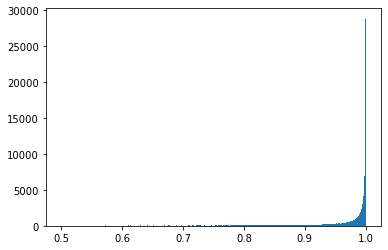

In [24]:
import matplotlib.pyplot as plt

_ = plt.hist(np.max(pipe.predict_proba(es_translated_to_eng_train),axis=1), bins='auto')  
plt.show()

In [25]:
torch.save(y_pred_es_train, 'synthetic_labels_for_translated_spanish_to_eng_TRAIN')

<b> The model look pretty sure about his predictions, so for now we keep them all </b>

<b> Now we train a Spanish clf base on those labels </b>

### Logistic regression -Spanish

In [55]:
pipe = make_pipeline(StandardScaler(), LogisticRegression( class_weight='balanced', max_iter=10000))
#pipe = make_pipeline(StandardScaler(), LogisticRegression( max_iter=1000))

pipe.fit(es_TRAIN, y_pred_es_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

# Train reulsts

### synthetic labels:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


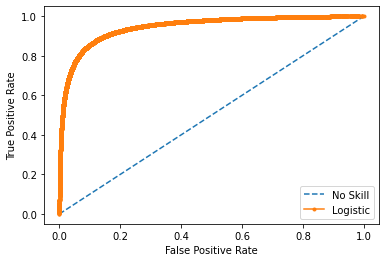

In [56]:
roc(list(y_pred_es_train), pipe.predict_proba(es_TRAIN))

### original labels:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950


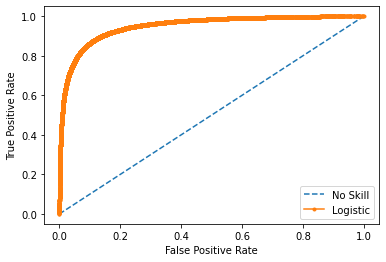

In [57]:
roc(list(es_train_set_y), pipe.predict_proba(es_TRAIN))

## Test- Spanish only

In [28]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(es_VAL), list(es_VAL_set_y), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87      1012
     class 1       0.87      0.88      0.87       988

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


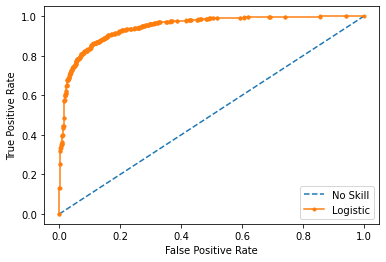

In [29]:
roc(list(es_VAL_set_y), pipe.predict_proba(es_VAL))

### precision recall

Logistic: auc=0.947


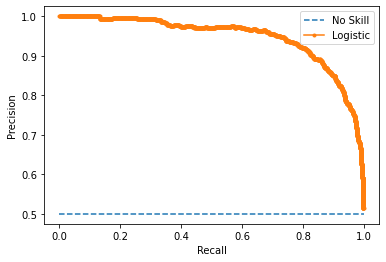

In [30]:
lr_probs = pipe.predict_proba(es_VAL)
lr_probs = lr_probs[:, 1]
recall_precision(es_VAL_set_y, lr_probs)

## Checking the results by fully Spanish model:

In [49]:
es_train_set_y.value_counts() # the original Spanish labels for train set

1    40000
0    40000
Name: stars, dtype: int64

In [50]:
pd.DataFrame(y_pred_es_train).value_counts() # the predictaed Spanish labels created by the English model. English_model.predict(Spanish_translated_to_English_train)

1    40097
0    39903
dtype: int64

In [51]:
pipe_spanish = make_pipeline(StandardScaler(), LogisticRegression( class_weight='balanced', max_iter=10000))
#pipe = make_pipeline(StandardScaler(), LogisticRegression( max_iter=1000))

pipe_spanish.fit(es_TRAIN, y_pred_es_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [52]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe_spanish.predict(es_VAL), list(es_VAL_set_y), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87      1012
     class 1       0.87      0.88      0.87       988

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


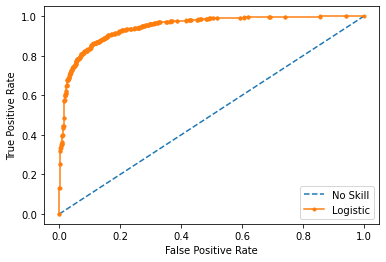

In [53]:
roc(list(es_VAL_set_y), pipe_spanish.predict_proba(es_VAL))